# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# load dataset and clean data

In [7]:
df = pd.read_csv("Teleco-customer-Churn.csv")

# Check shape and first few rows
print("Rows, Columns:", df.shape)
df.head()

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop missing values
df.dropna(inplace=True)

# Drop customerID (not useful for prediction)
df = df.drop("customerID", axis=1)



Rows, Columns: (7043, 21)


# ecode features

In [8]:
# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# One-hot encode features
X_encoded = pd.get_dummies(X, drop_first=True)


# train test split

In [10]:
# Separate features (X) and target (y) before encoding
X = df.drop("Churn", axis=1)
y = df["Churn"]

# One-hot encode features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


# feature scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# train model

In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)


# model evaluation

Accuracy: 0.8038379530916845


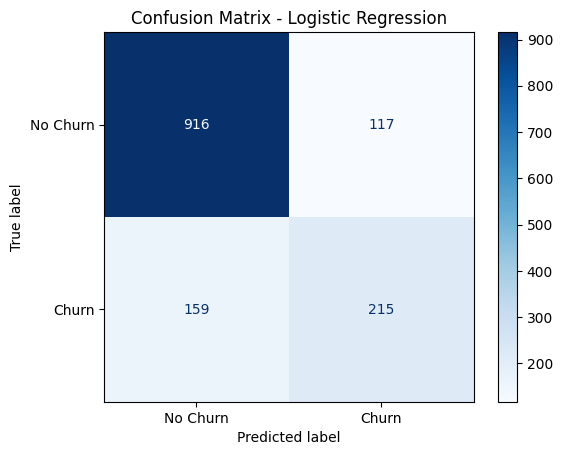

In [13]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Business Interpretation

## Confusion Matrix – Business Interpretation

- **True Positives (TP):** Correctly predicted churners → we can target them with retention offers.  
- **True Negatives (TN):** Correctly predicted loyal customers → no action needed.  
- **False Positives (FP):** Loyal customers predicted as churn → unnecessary retention cost.  
- **False Negatives (FN):** Real churners predicted as non-churn → biggest business risk (lost customers).  

**Key Insight:** Minimizing False Negatives is most important, because losing real customers hurts the business more than giving offers to loyal ones.
